In [1]:
from Parser import parse_frames
from scipy.signal import medfilt
from Functions import find_extremas, filter_extremas, detect_side, analyse_each_rep
from JointAngles import JointAngles
import numpy as np
import math
import glob
import os
import itertools
import itertools
import pickle
import matplotlib.pyplot as plt


Starting...
Keypoints from folder: shoulder_press_correct_1
Detected side: front
first extrema index: 23
Extrema array size: 6
Count list:[62, 63, 66, 61, 65]
length count list: 5
threshold is: 59
ls list: []
[160.58505749 162.06068233 162.16206023 166.37169458 165.49575091
 164.81145611]
first extrema index: 20
Extrema array size: 7
Count list:[65, 64, 65, 63, 5, 59]
length count list: 6
threshold is: 57
ls list: [5]
[165.41132078 165.92473964 165.9385373  169.95215549 165.19529662
 165.92021394 163.27243854]
indexes to delete: [4]
size: 1
point to remove165.1952966163201
point to remove index: [[4]]
start_points: 165.92021394074072
start point index: [[4]]
267 327
length new array: 6
new array: [165.41132078 165.92473964 165.9385373  169.95215549 165.92021394
 163.27243854]
new count list: [65, 64, 65, 63, 59, 5, 59]
first extrema index: 14
Extrema array size: 7
Count list:[68, 66, 63, 62, 9, 55]
length count list: 6
threshold is: 60
ls list: [9, 55]
[153.43459555 156.51221531 154.47

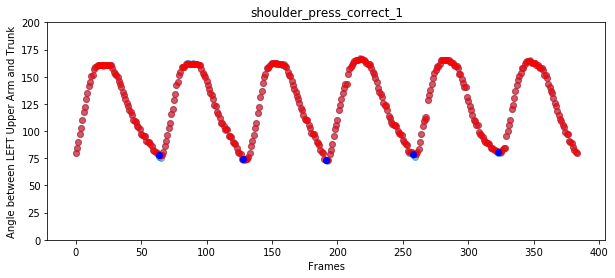

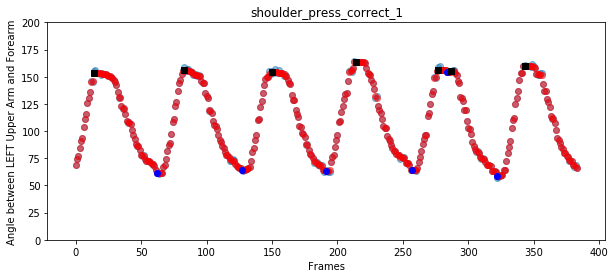

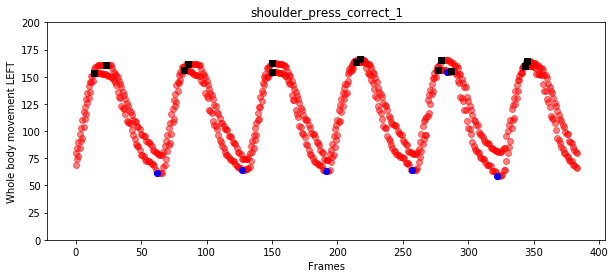


------------------------------------------------------------------------------------------------------------------------                                                                                               
RIGHT ARM                                                                                               
------------------------------------------------------------------------------------------------------------------------


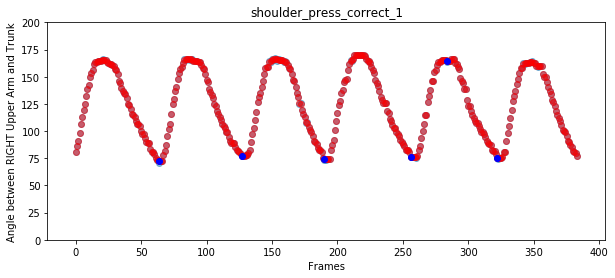

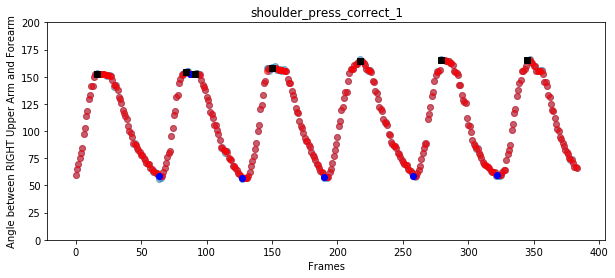

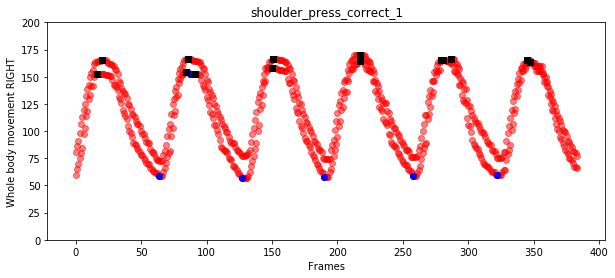


Repetition: 1

Left upper arm - left forearm -> Minimum Angle:61.67114018932947
Left upper arm - left forearm -> Maximum Angle:153.43459555035213
Left upper arm - trunk -> Maximum Angle: 160.58505749418651
Left upper arm - trunk -> Minimum Angle: 80.24529718281734

Right upper arm - left forearm -> Minimum Angle:58.494904585005685
Right upper arm - left forearm -> Maximum Angle:154.62635604715274
Right upper arm - trunk -> Maximum Angle: 165.92473963858305
Right upper arm - trunk -> Minimum Angle: 72.88929505876278


Repetition: 2

Left upper arm - left forearm -> Minimum Angle:61.67114018932947
Left upper arm - left forearm -> Maximum Angle:156.5122153056858
Left upper arm - trunk -> Maximum Angle: 162.06068233345394
Left upper arm - trunk -> Minimum Angle: 78.01396748924039

Right upper arm - left forearm -> Minimum Angle:56.742370770602555
Right upper arm - left forearm -> Maximum Angle:157.75747013810582
Right upper arm - trunk -> Maximum Angle: 165.93853729656712
Right upper arm 

IndexError: index 0 is out of bounds for axis 0 with size 0

In [2]:
# modify this path for other videos 
# input_folder = "/home/aleko/Documents/Projects/IndividualProject/bicepvid"
# input_folder = "C:\\Users\\altaok\\Documents\\GitHub\\IndividualProject\\keypoints_for_all\\shoulder press"
input_folder = 'C:\\Users\\ak5u16\\Desktop\\IndividualProject\\keypoints_for_all\\shoulder press'
folder_paths = glob.glob(os.path.join(input_folder, 'shoulder_press_correct*'))     

        

for folder in folder_paths:
    print("Starting..." + "\nKeypoints from folder: " + os.path.basename(folder))
    video_name = os.path.basename(folder).replace('output_points_', '')
    frame_poses = parse_frames(folder)
       
    joint_angles = JointAngles('shoulder press', frame_poses)
    print('Detected side: ' + joint_angles.side)
   

    left_upArm_trunk_angles = np.array(joint_angles.left_upArm_trunk_angles)
    left_upArm_trunk_angles_filtered = medfilt(medfilt(left_upArm_trunk_angles, 5), 5)
    
    right_upArm_trunk_angles = np.array(joint_angles.right_upArm_trunk_angles)
    right_upArm_trunk_angles_filtered = medfilt(medfilt(right_upArm_trunk_angles, 5), 5)
    
    left_upArm_forearm_angles = np.array(joint_angles.left_upArm_forearm_angles)
    left_upArm_forearm_angles_filtered = medfilt(medfilt(left_upArm_forearm_angles, 5), 5)
    
    right_upArm_forearm_angles = np.array(joint_angles.right_upArm_forearm_angles)
    right_upArm_forearm_angles_filtered = medfilt(medfilt(right_upArm_forearm_angles, 5), 5)
    
        
    # Find left upper arm and trunk maximum angles to detect wrong form 
    left_upArm_trunk_maximas, indexesmax1a = find_extremas(left_upArm_trunk_angles_filtered)
    left_upArm_trunk_maximas = filter_extremas(left_upArm_trunk_angles_filtered, left_upArm_trunk_maximas)
    
    # print("Largest angles between upper arm and trunk: " + str(upArm_trunk_maximas))
    # Find right upper arm and trunk maximum angles to detect wrong form 
    right_upArm_trunk_maximas, indexesmax1b = find_extremas(right_upArm_trunk_angles_filtered)
    right_upArm_trunk_maximas = filter_extremas(right_upArm_trunk_angles_filtered, right_upArm_trunk_maximas)
    
    # Count repetitions
    left_upArm_forearm_maximas, indexesmax2a = find_extremas(left_upArm_forearm_angles_filtered)    
    left_upArm_forearm_maximas = filter_extremas(left_upArm_forearm_angles_filtered, left_upArm_forearm_maximas)
    # print("Number of maxima points between Upper Arm and Forearm: " + str(upArm_forearm_maximas.size))
    # print(upArm_forearm_maximas)
    
    right_upArm_forearm_maximas, indexesmax2b = find_extremas(right_upArm_forearm_angles_filtered) 
    right_upArm_forearm_maximas = filter_extremas(right_upArm_forearm_angles_filtered, right_upArm_forearm_maximas)
   

    # Find upper arm and forearm minimum points to count reps     
    left_upArm_forearm_minimas, indexesmin1a = find_extremas(left_upArm_forearm_angles_filtered, maxima=False)
    print('----------------------\nFiltering minimas')
    print(left_upArm_forearm_minimas)
    left_upArm_forearm_minimas = filter_extremas(left_upArm_forearm_angles_filtered, left_upArm_forearm_minimas)
  
    print("Number of reps performed LEFT: " + str(left_upArm_forearm_minimas.size))
    # print(left_upArm_forearm_minimas)
    
    right_upArm_forearm_minimas, indexesmin1b = find_extremas(right_upArm_forearm_angles_filtered, maxima=False)
    print('----------------------\nFiltering minimas')
    print(right_upArm_forearm_minimas)
    right_upArm_forearm_minimas = filter_extremas(right_upArm_forearm_angles_filtered, right_upArm_forearm_minimas)
    print("Number of reps performed RIGHT: " + str(right_upArm_forearm_minimas.size))
    
    left_upArm_trunk_minimas, indexesmin2a = find_extremas(left_upArm_trunk_angles_filtered, maxima=False)
    right_upArm_trunk_minimas, indexesmin2b = find_extremas(right_upArm_trunk_angles_filtered, maxima=False)

    print('\n'+ '-'*120 + '\nLEFT ARM'.center(100) + '\n' + '-'*120 )
    # Plot 1 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_trunk_angles.shape[0]), left_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2a, left_upArm_trunk_angles_filtered[indexesmin2a], 'bo')
    # print(indexesmax1a)
    plt.show()
    
    # Plot 2 - Left
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles.shape[0]), left_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between LEFT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1a = left_upArm_forearm_angles_filtered[indexesmax2a]
    min_points1a = left_upArm_forearm_angles_filtered[indexesmin1a]
    plt.plot(indexesmin1a, min_points1a, 'bo')
    plt.plot(indexesmax2a, max_points1a, 'ks')

    """
        # Annotate local maximas
        for maxp, indx in zip(max_points, indexesmax2):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    
    plt.show()
    
    # Plot 3 - All angles LEFT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(left_upArm_forearm_angles_filtered.shape[0]), left_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(left_upArm_trunk_angles_filtered.shape[0]), left_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement LEFT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints   
    plt.plot(indexesmin1a, left_upArm_forearm_angles_filtered[indexesmin1a], 'bo')
    plt.plot(indexesmax1a, left_upArm_trunk_angles_filtered[indexesmax1a], 'ks')
    plt.plot(indexesmax2a, left_upArm_forearm_angles_filtered[indexesmax2a], 'ks')  
    plt.show()
   
    
    #---------------------------------------------------------------------------------------------------------------------
    # Same for right side
    
    print('\n'+ '-'*120 + '\nRIGHT ARM'.center(200) + '\n' + '-'*120 )
    
    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_trunk_angles.shape[0]), right_upArm_trunk_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Trunk')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200)
    
    # Annontate minima points
    plt.plot(indexesmin2b, right_upArm_trunk_angles_filtered[indexesmin2b], 'bo')
    plt.show()

    # Plot 3 - Right
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles.shape[0]), right_upArm_forearm_angles, alpha=0.5)
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Angle between RIGHT Upper Arm and Forearm')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    
    # Annotate minima apoints on the graph   
    max_points1b = right_upArm_forearm_angles_filtered[indexesmax2b]
    min_points1b = right_upArm_forearm_angles_filtered[indexesmin1b]
    plt.plot(indexesmin1b, min_points1b, 'bo')
    plt.plot(indexesmax2b, max_points1b, 'ks')
    
    """
        # Annotate local maximas
        for maxp, indx in zip(max_points1b, indexesmax2b):
            plt.annotate('local max', xy=(indx, maxp), xytext=(indx, maxp+25),
                    arrowprops=dict(facecolor='black', shrink=0.05))

        # Annotate local minimas
        for minp, indx in zip(min_points, indexesmin):
            plt.annotate('local min', xy=(indx, minp), xytext=(indx, minp-35),
                    arrowprops=dict(facecolor='black', shrink=0.05))     
    """
    plt.show()


    # Plot 4 - All angles RIGHT
    plt.figure(figsize=(10,4))
    plt.scatter(np.arange(right_upArm_forearm_angles_filtered.shape[0]), right_upArm_forearm_angles_filtered, c='r', alpha=0.5)
    plt.scatter(np.arange(right_upArm_trunk_angles_filtered.shape[0]), right_upArm_trunk_angles_filtered, c='r', alpha=0.5)
    plt.title(video_name)
    plt.xlabel('Frames')
    plt.ylabel('Whole body movement RIGHT')
    # Set range on y-axis so the plots are consistent
    plt.ylim(0,200) 
    # Annotate minima apoints     
    plt.plot(indexesmin1b, right_upArm_forearm_angles_filtered[indexesmin1b], 'bo')
    plt.plot(indexesmax1b, right_upArm_trunk_angles_filtered[indexesmax1b], 'ks')
    plt.plot(indexesmax2b, right_upArm_forearm_angles_filtered[indexesmax2b], 'ks')
    plt.show()
   
    
    # Each rep analysis
    # local minimums for upper arm and forearm are min angles in each rep
    analyse_each_rep(string='analysis', extremas1=left_upArm_forearm_minimas, uf_angles1a=left_upArm_forearm_angles_filtered, ut_angles2a=left_upArm_trunk_angles_filtered,
                    extremas2=right_upArm_forearm_minimas, uf_angles1b=right_upArm_forearm_angles_filtered, ut_angles2b=right_upArm_trunk_angles_filtered)
    

    print('\n' + '='*120 + '\n')


In [3]:
a = np.array([1,2,3])
print(a[1:])

[2 3]


In [4]:
np.arange(24)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [4]:
for a, b in itertools.combinations([1,2,3,4,4], 2):
    print(a+b)

3
4
5
5
5
6
6
7
7
8


In [14]:
a = np.array([1,3,4,5])
index = np.where(a == 3)
print(index[0])
a = np.delete(a, index[0][0])
print(a)


[1]
[1 4 5]


In [15]:
d = {1:'a', 2:'b'}
g = {1:'b', 2:'t'}

ds = [d, g]
a = {}
for k in d.keys():
    a[k] = tuple(d[k] for d in ds)
print(a.items())

dict_items([(1, ('a', 'b')), (2, ('b', 't'))])
